# Project :
The retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.


The dataset contains data on 5000 customers.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt




In [2]:
bank = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [3]:
bank.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


### Question 1:  Read the column description and ensure you understand each attribute well


#### Data Exploration

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


All the columns/attributes have 5000 non-null values.

In [6]:
# Check if any missing value
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There is no null value present in the dataframe.

In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
#experience cant be in negative, exploring how many negative atributes present

In [9]:
bank[bank['Experience']<0]['Experience'].count()

52

In [10]:
# Experience can't have negative values hence replacing it with median
bank[bank['Experience'] == -1]['Experience'].count()#33

33

In [11]:
bank[bank['Experience'] == -2]['Experience'].count() #15

15

In [12]:
bank[bank['Experience'] == -3]['Experience'].count() #4

4

Total 52 negative values in Experience.

In [13]:
#another way
filter = bank['Experience']<0
print(len(bank[filter]))

bank = bank[-filter]

52


dropping negative experience values

In [14]:
bank.shape

(4948, 14)

In [15]:
#Look at the data distribution
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4948.0,2501.268795,1443.277676,1.0,1254.75,2497.5,3750.25,5000.0
Age,4948.0,45.557195,11.320735,24.0,36.00,46.0,55.00,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.00,43.0
Income,4948.0,73.814470,46.112596,8.0,39.00,64.0,98.00,224.0
ZIP Code,4948.0,93151.573363,2126.669017,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4948.0,2.391471,1.148444,1.0,1.00,2.0,3.00,4.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.70,1.5,2.60,10.0
Education,4948.0,1.878941,0.839745,1.0,1.00,2.0,3.00,3.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.00,0.0,101.00,635.0
Personal Loan,4948.0,0.097009,0.296000,0.0,0.00,0.0,0.00,1.0


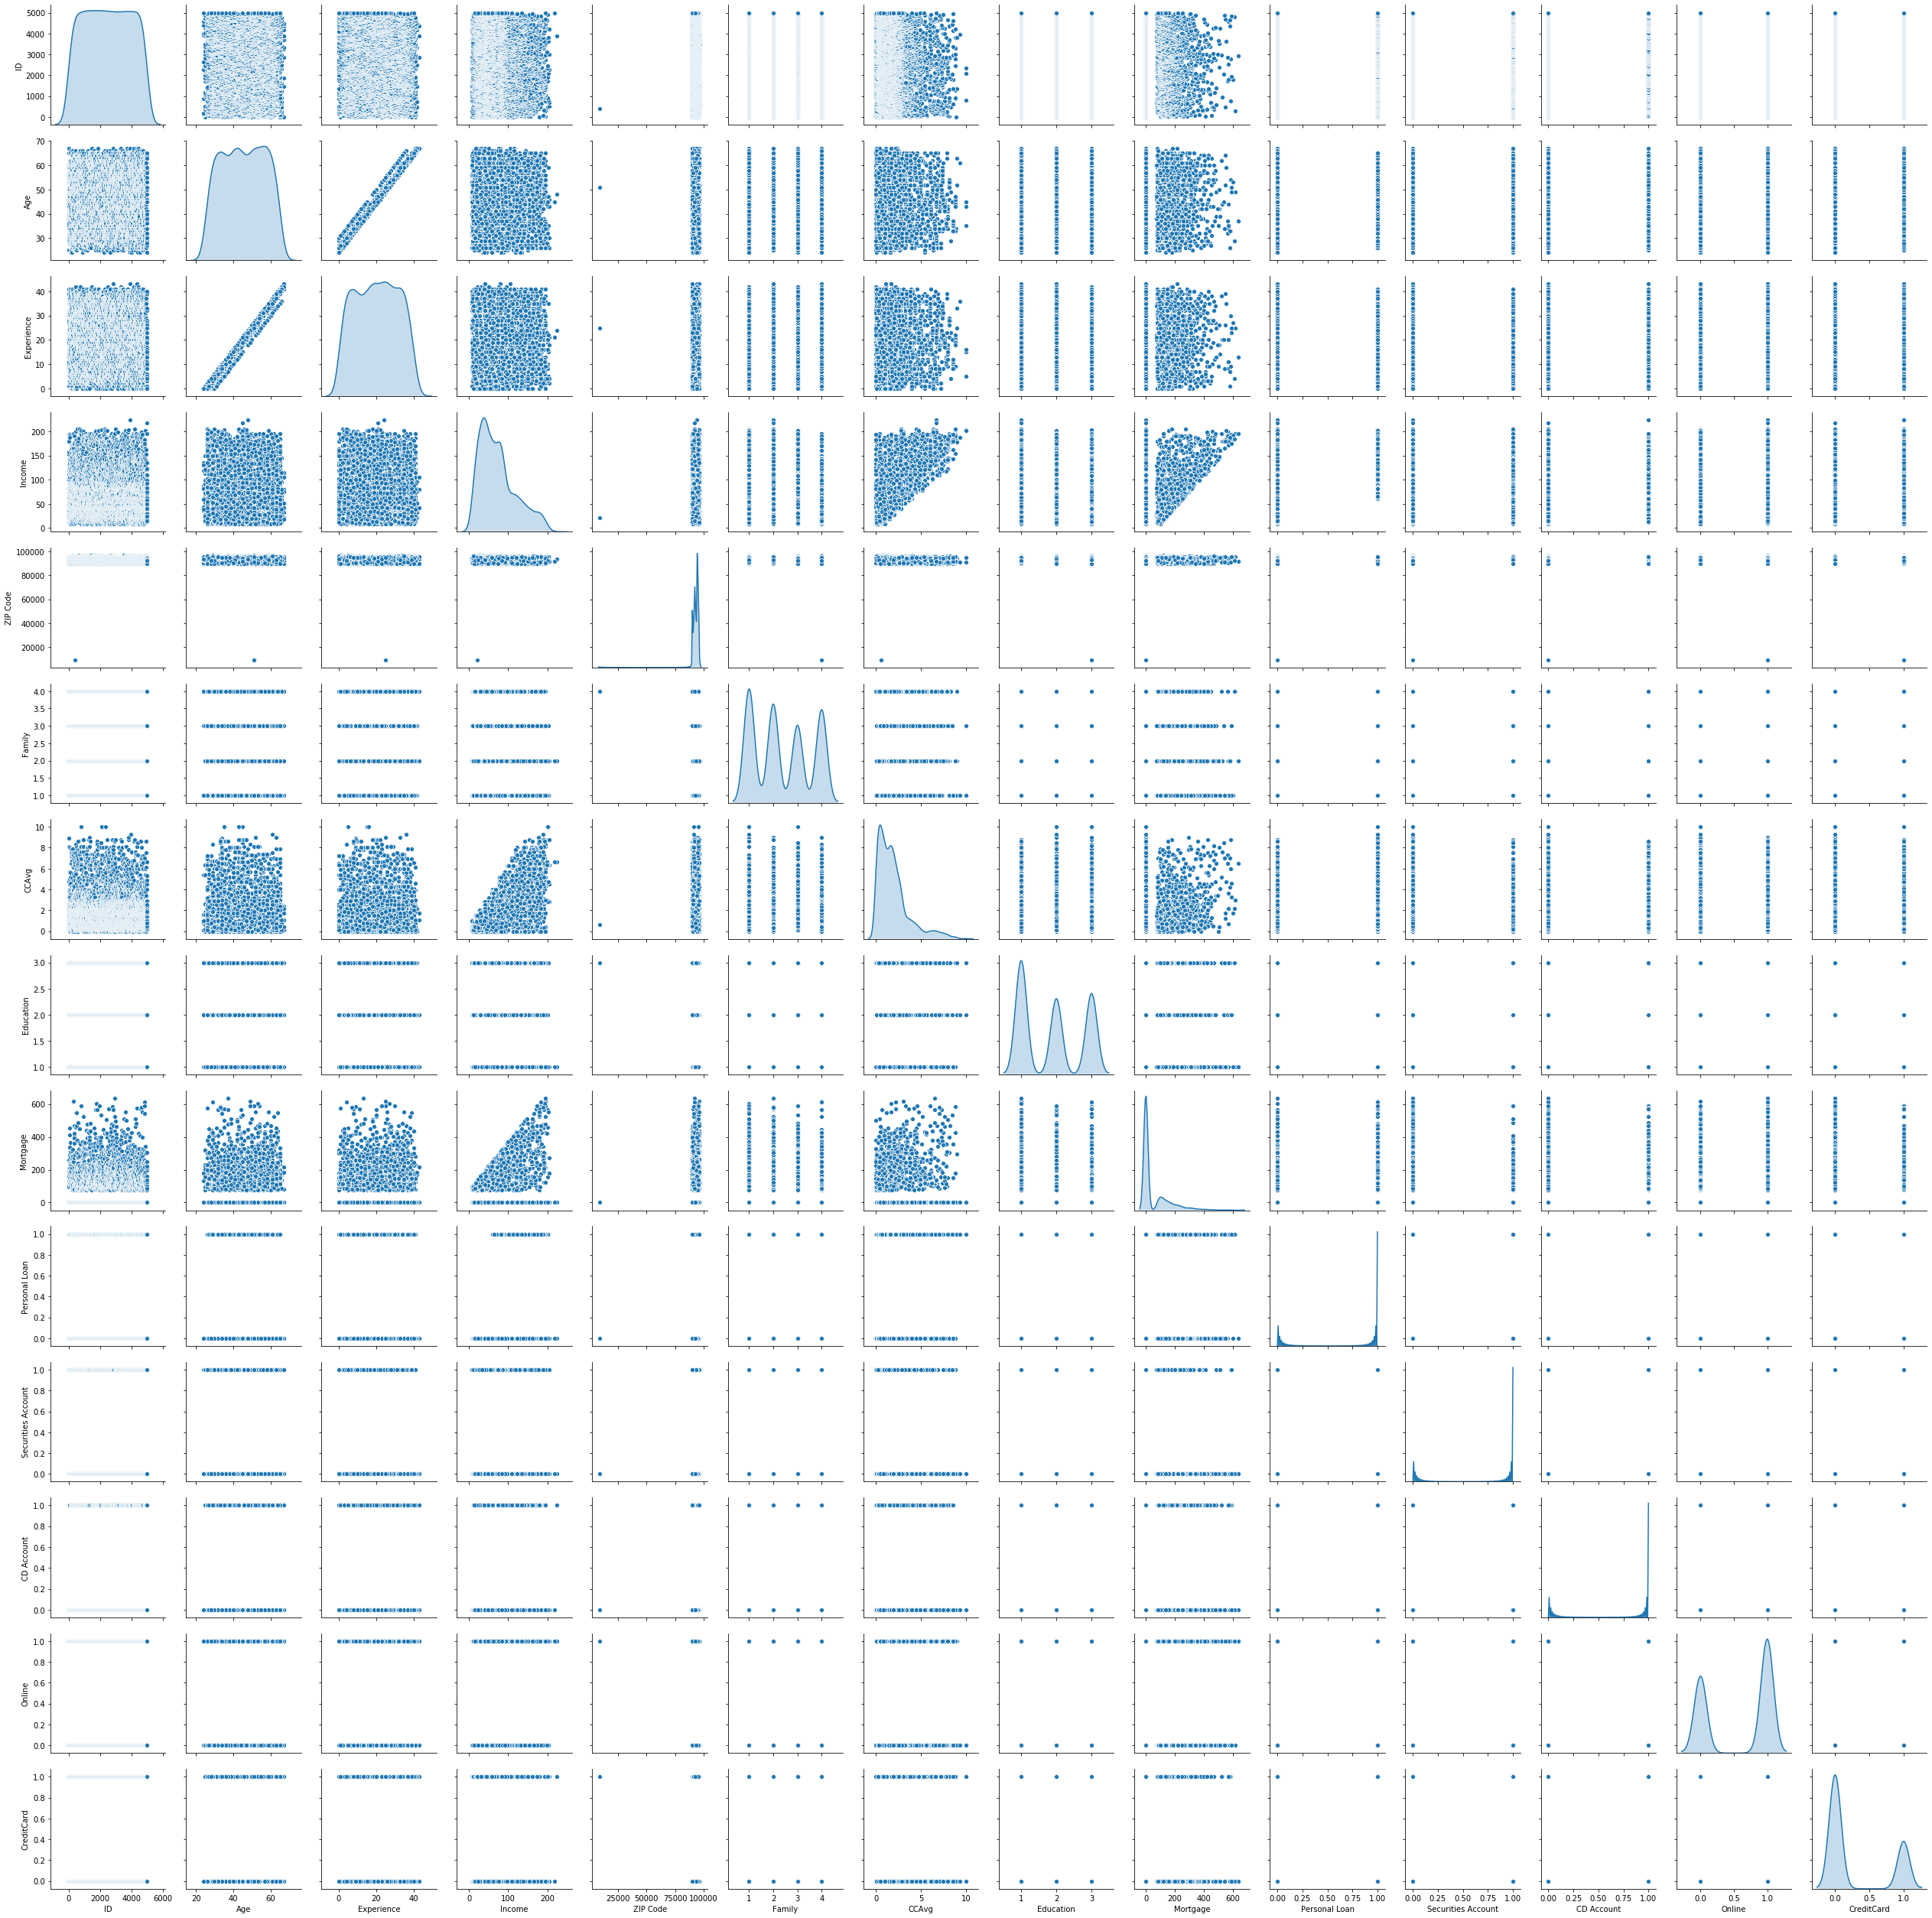

In [16]:
sns.pairplot(data =bank,diag_kind ='kde')

### Question2: Study the data distribution in each attribute, share your findings. (10 points)


1) ID: This attribute can be dropped.

2). Age:Three small peaks can be indicating three values of age would be slightly more in number.However, the mean and median
    of the attribute is equal.The distribution is in considerable shape.

3). Eductaion :
    Mean and median is almost equal. Data is finely distributed. A few peaks shows different values dominance.
    
4). Income :
	We can clearly see data is highly left skewed.Data for less income customers is more in the sample.
    
5). ZIP Code: ZIP cant dont matter for loan
	The attribute has sharp peaks telling the data from particular places are collected more.Spread is also less in the sample.
	More data from different places can be collected.
    
6).Family:
	It has 4 peaks(4 values) , families with least member are more
    
7).Mortage: 
	This attribute is highly left skewed with a very high peak on the left telling us that most customer are having least mortage while a very few have some mortage.
    
8).Securities Account :
	This attributes tells us that most cutomers dont have Security account.
    
9).CD account:
	Most of the customers dont have CD accounts.
    
10).Online:
	Higher number of customers use online banking
    
11).Credit Card:
	This attribute has less customers using CC in comparison to the CC users.


###### Relationship between the attributes:

- Experience and age are in linear relationship. One can be dropped among them will not effect the accuracy.



In [17]:
bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.009794,-0.009406,-0.017255,0.013516,-0.016382,-0.025607,0.021902,-0.011172,-0.025124,-0.018961,-0.007085,-0.001508,0.017294
Age,-0.009794,1.000000,0.994101,-0.058006,-0.029325,-0.039279,-0.050879,0.046222,-0.015184,-0.014204,0.000496,0.003261,0.013542,0.007496
Experience,-0.009406,0.994101,1.000000,-0.049245,-0.028564,-0.045610,-0.048939,0.018243,-0.013459,-0.014121,-0.000457,0.005450,0.013518,0.008876
Income,-0.017255,-0.058006,-0.049245,1.000000,-0.014958,-0.155666,0.646178,-0.187992,0.206921,0.504228,-0.002327,0.170171,0.014433,-0.004493
ZIP Code,0.013516,-0.029325,-0.028564,-0.014958,1.000000,0.011109,-0.002703,-0.017391,0.008264,0.000251,0.003555,0.020149,0.019155,0.007355
Family,-0.016382,-0.039279,-0.045610,-0.155666,0.011109,1.000000,-0.107230,0.064032,-0.020419,0.063088,0.020155,0.015274,0.008466,0.012905
CCAvg,-0.025607,-0.050879,-0.048939,0.646178,-0.002703,-0.107230,1.000000,-0.133939,0.109905,0.369388,0.012477,0.137587,-0.003476,-0.007377
Education,0.021902,0.046222,0.018243,-0.187992,-0.017391,0.064032,-0.133939,1.000000,-0.032559,0.138339,-0.007508,0.014639,-0.013932,-0.012604
Mortgage,-0.011172,-0.015184,-0.013459,0.206921,0.008264,-0.020419,0.109905,-0.032559,1.000000,0.142322,-0.003717,0.089369,-0.006754,-0.006910
Personal Loan,-0.025124,-0.014204,-0.014121,0.504228,0.000251,0.063088,0.369388,0.138339,0.142322,1.000000,0.022216,0.315769,0.006175,0.002776


### Question 3: Get the target distribution.

In [18]:

bank["Personal Loan"].value_counts()

0    4468
1     480
Name: Personal Loan, dtype: int64

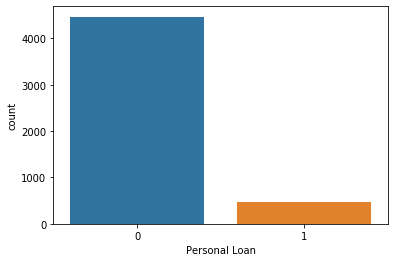

In [19]:
sns.countplot(bank["Personal Loan"])

In [20]:
count_no_sub = len(bank[bank['Personal Loan']==0])
print('count_no_sub :',count_no_sub)
count_sub = len(bank[bank['Personal Loan']==1])
print('count_sub :',count_sub)
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print('pct_of_no_sub')
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

count_no_sub : 4468
count_sub : 480
pct_of_no_sub
percentage of no subscription is 90.29911075181892
percentage of subscription 9.700889248181083


###### Looking into the distribution to the various attributes in relation with the target.

In [21]:
bank.groupby(bank['Personal Loan']).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2513.152641,45.609893,20.383393,66.194270,93151.398389,2.367726,1.724349,1.840868,51.884736,0.102059,0.036258,0.596016,0.293644
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


Observations:
1). The average Income of customers who took loan is more than double of the avg income of customers who didn’t take loan last year.

2). The Avg. spending on credit cards per month ($000) is also more than double for the customer's who took loan.

3). The average mortage for loan availing customers is approximately double for the not availing customers.

4). Avg literacy is less for non loan takers.

As given in the data description that person who took loan in the last camping is 9.6%.

In [22]:
#Looking at the attributes where the variance is less than 1
a = bank.var()
a[a<1]

Education             0.705172
Personal Loan         0.087616
Securities Account    0.093428
CD Account            0.057321
Online                0.240638
CreditCard            0.207630
dtype: float64

Experience and age is having a good corelation. One among them can be dropped. Target is having comparetively better relation with Income.

In [23]:
bank.drop(columns ='Experience',inplace= True)
bank.drop(columns ='ZIP Code',inplace=True)
bank.drop(columns ='ID',inplace=True)
bank.head(2)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0


### Question 4: Split the data into training and test set in the ratio of 70:30 respectively.

In [24]:
X=bank.drop(columns='Personal Loan')
y=bank['Personal Loan']

In [25]:
standardized_X = preprocessing.scale(X)
standardized_X



array([[-1.81607218, -0.53818221,  1.40075673, ..., -0.2549552 ,
        -1.21714598, -0.64540482],
       [-0.04922393, -0.86350581,  0.52992568, ..., -0.2549552 ,
        -1.21714598, -0.64540482],
       [-0.57927841, -1.36233535, -1.21173641, ..., -0.2549552 ,
        -1.21714598, -0.64540482],
       ...,
       [ 1.54093948, -1.08038822, -0.34090536, ..., -0.2549552 ,
        -1.21714598, -0.64540482],
       [ 1.71762431, -0.53818221,  0.52992568, ..., -0.2549552 ,
         0.82159414, -0.64540482],
       [-1.55104494,  0.19921797,  0.52992568, ..., -0.2549552 ,
         0.82159414,  1.54941514]])

In [26]:
#normalize the data attributes
normalized_X = preprocessing.normalize(X)

#Recursive Feature Elimination

data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Question 5: Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points).

##### Build Logistic model

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Devendra Trivedi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the test set results and calculating the accuracy


In [29]:
y_pred = logreg.predict(X_test)

In [30]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.95


In [31]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


#### Confusion Matrix

In [32]:
confusion_matri = confusion_matrix(y_test, y_pred)
print(confusion_matri)

[[1323   17]
 [  61   84]]


Compute precision, recall, F-measure and support

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1340
           1       0.83      0.58      0.68       145

    accuracy                           0.95      1485
   macro avg       0.89      0.78      0.83      1485
weighted avg       0.94      0.95      0.94      1485



##### Build KNN Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
y_pred_knn = classifier.predict(X_test)

In [36]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(classifier.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.95


In [37]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [38]:
cfm=confusion_matrix(y_test, y_pred_knn)
print('cfm')
print(classification_report(y_test, y_pred_knn))

cfm
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1340
           1       0.53      0.37      0.43       145

    accuracy                           0.91      1485
   macro avg       0.73      0.67      0.69      1485
weighted avg       0.89      0.91      0.90      1485



Comparing Error Rate with the K Value

In [39]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

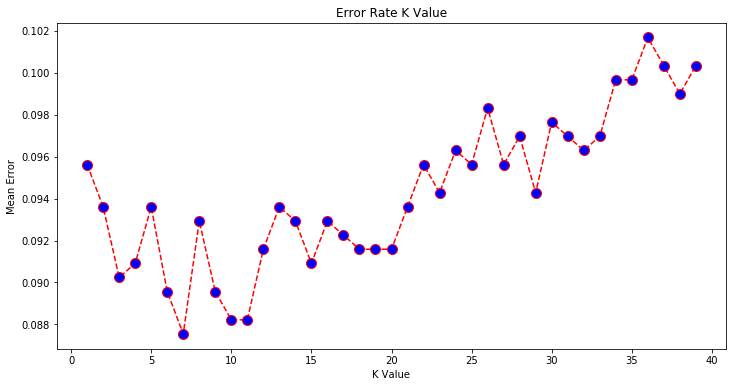

In [40]:

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


##### Naive Bayes Classification

In [41]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [42]:

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

Evaluating Model

In [43]:

classifier.score(X_train,y_train)

0.9460005775339301

In [44]:
classifier.score(X_test, y_test)

0.9063973063973064

In [45]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred))

Accuracy on test set: 0.8774410774410775


Text(91.68, 0.5, 'predicted label')

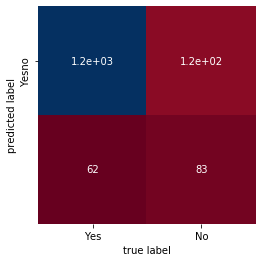

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,xticklabels=['Yes', 'No'], yticklabels=['Yes' 'no'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1340
           1       0.41      0.57      0.48       145

    accuracy                           0.88      1485
   macro avg       0.68      0.74      0.70      1485
weighted avg       0.90      0.88      0.89      1485



### 7. Give your reasoning on which is the best model in this case and why it performs better?

The logistic Regression model is the best as the accuracy of the train and test set is almost similar and also the precsion and recall accuracy is good. The confusion matrix is also better in comparision to other models.

The requirement is to classify the target. The KNN is distance based which not perfect for this situation.Though the accuracy is good but confusion matrix tells that is correct predictions is not that much acceptable.

The Naive Bayes giving the ccuracy less in comaprision to other models meaning the probability of determing the target correctly is less.

# PREDICTIONS

In [48]:
#Age	Income	Family	CCAvg	Education	Mortgage	Securities Account	CD Account	Online	CreditCard
#Above is sequence of our input variables

Prediction1


Age is 42, Income-420, Family member-6, cc avg-1.55,   education-2(graduate),  mortage-0, security-1, cs amt-1, online-1, credircard-1

In [53]:
if (logreg.predict([[42, 420, 6, 1.55, 2,0,1,1,1,1]])==1):
    print('Customer Will Accept Loan')
else:
    print('Customer will not take loan')

Customer Will Accept Loan


Prediction2

Age is 33, Income-153, Family member-3, cc avg-0.75,   education-3(advance),  mortage-1, security-1, cs amt-0, online-1, credircard-0

In [54]:
if (logreg.predict([[33, 153, 3, 0.75, 3,1,1,0,1,0]])==1):
    print('Customer Will Accept Loan')
else:
    print('Customer will not take loan')

Customer Will Accept Loan


##Prediction3##

Age is 25, Income-80, Family member-4, cc avg-1.15,   education-1-undergrad,  mortage-1, security-0, cs amt-0, online-0, credircard-1

In [55]:
if (logreg.predict([[22, 80, 4, 1.15, 1,1,0,0,0,1]])==1):
    print('Customer Will Accept Loan')
else:
    print('Customer will not take loan')

Customer will not take loan
